In [2]:
import os
import sys

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
dataset=pd.read_csv("data.csv")
dataset.head()
dataset

,chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfccs,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,...,poly_features,zero_crossing_rate,harmonic_centroid,harmonic_tonnetz,harmonic_rms,harmonic_spectral_flatness,harmonic_spectral_contrast,harmonic_spectral_rolloff,harmonic_zero_crossing_rate,class
0,0.405942,0.472502,0.241881,0.229716,-7.147740,0.026444,1299.500067,1658.362444,17.401928,0.004822,...,0.249374,0.047016,843.909725,-0.019341,0.019667,0.000649,19.673348,1826.922286,0.022045,assistance off
1,0.472869,0.403376,0.248011,0.608693,-5.473597,0.039452,1400.200682,1819.026910,17.355031,0.003442,...,0.437717,0.044861,876.452438,0.005621,0.026408,0.000651,19.355344,1771.595348,0.018446,assistance off
2,0.451070,0.438729,0.255061,0.662231,-5.992201,0.043908,1381.211234,1728.447691,17.577492,0.005428,...,0.456875,0.056647,858.631294,-0.004209,0.027682,0.000577,19.572603,1810.400391,0.021757,assistance off
3,0.465936,0.488839,0.254096,0.590375,-6.565488,0.040032,1291.585329,1698.169927,17.533914,0.005174,...,0.416709,0.045178,830.966292,0.011887,0.025824,0.000407,19.625258,1752.847909,0.021221,assistance off
4,0.500591,0.500903,0.257509,0.574498,-7.683528,0.038681,1230.336304,1686.100559,17.564766,0.003417,...,0.405454,0.037707,876.393612,0.004825,0.025890,0.000681,19.747960,1636.138916,0.025373,assistance off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.320585,0.360972,0.214530,1.029822,-16.066755,0.050752,1980.002852,2158.087737,21.337520,0.017429,...,0.337920,0.111399,1347.192344,-0.007183,0.043869,0.005473,24.802369,2525.889587,0.063995,hello
3949,0.406721,0.443279,0.238275,0.781018,-16.405330,0.039501,2419.303388,2325.301043,20.082895,0.028263,...,0.300632,0.136433,1416.064868,0.000448,0.034590,0.007167,23.309083,2732.729117,0.062222,hello
3950,0.365377,0.409115,0.225390,0.821256,-17.146938,0.043208,1930.901676,2044.480949,20.104520,0.018393,...,0.310116,0.104292,1203.158622,-0.004164,0.033083,0.004618,22.891717,2082.013640,0.051918,hello
3951,0.388034,0.443211,0.235701,0.738131,-16.789186,0.039363,1990.073375,2274.138626,19.599763,0.020506,...,0.279512,0.102178,1320.318022,-0.003163,0.030124,0.006198,22.296483,2497.189002,0.056122,hello


# Audio Features Documentation

| Feature Name                  | Description                                                                                                            |
|-------------------------------|------------------------------------------------------------------------------------------------------------------------|
| chroma_stft                   | Chroma short-time Fourier transform: Represents the 12 different pitch classes and their intensities in a segment.  |
| chroma_cqt                    | Chroma constant-Q transform: Similar to chroma_stft but uses a constant-Q transform for more musically relevant bins.   |
| chroma_cens                   | Chroma energy normalized statistics: Normalized version of chroma features, emphasizing energy distribution.           |
| melspectrogram                | Mel spectrogram: Represents the power spectrum of a signal, with emphasis on perceptually relevant frequency bands.     |
| mfccs                         | Mel-frequency cepstral coefficients: Capture the shape of the power spectrum, commonly used in speech and audio analysis.|
| rms                           | Root mean square: Represents the energy of an audio signal.                                                            |
| spectral_centroid             | Center of mass of the spectrum: Indicates where the "center of mass" of the spectrum is located.                        |
| spectral_bandwidth            | Width of the spectral band: Describes the width of the spectral band around the spectral centroid.                        |
| spectral_contrast             | Spectral contrast: Measures the difference in amplitude between peaks and valleys in the spectrum.                     |
| spectral_flatness             | Spectral flatness: Indicates how flat or peaky the spectrum is.                                                          |

### Additional Harmonic Features:

| Feature Name                     | Description                                                                                          |
|----------------------------------|------------------------------------------------------------------------------------------------------|
| harmonic_centroid                | Centroid of the harmonic spectrum: Indicates the center of mass of the harmonic component.         |
| harmonic_tonnetz                 | Tonal centroid features: Captures harmonic content in a way similar to human perception of tonality.|
| harmonic_rms                     | RMS of the harmonic component: Represents the energy of the harmonic part of the signal.            |
| harmonic_spectral_flatness       | Spectral flatness of the harmonic component: Similar to spectral flatness but for the harmonic part.  |
| harmonic_spectral_contrast       | Spectral contrast of the harmonic component: Measures the difference in amplitude for harmonic peaks and valleys.|
| harmonic_spectral_rolloff        | Spectral rolloff of the harmonic component: Frequency below which a specified percentage of the total harmonic energy lies. |
| harmonic_zero_crossing_rate      | Zero-crossing rate of the harmonic component: Measures the rate at which the signal changes its sign in the harmonic part.|

# Importance of Audio Features

| Feature Name                  | Importance                                                                                                          |
|-------------------------------|----------------------------------------------------------------------------------------------------------------------|
| chroma_stft                   | Useful for classification, chord recognition, and audio similarity analysis.                            |
| chroma_cqt                    | Valuable for pitch detection, music transcription, and recognizing musical patterns.                                 |
| chroma_cens                   | Enhances chroma features for improved musical analysis, such as chord and genre recognition.                         |
| melspectrogram                | Fundamental for speech recognition, music genre classification, and audio event detection.                          |
| mfccs                         | Widely used in speech and speaker recognition, audio classification, and emotion detection.                          |
| rms                           | Provides a measure of overall signal energy, crucial for audio segmentation and scene analysis.                      |
| spectral_centroid             | Useful in audio segmentation, speech recognition, and musical instrument classification.                             |
| spectral_bandwidth            | Important for audio classification tasks, such as distinguishing between different musical instruments.              |
| spectral_contrast             | Helps in recognizing sound texture, music genre classification, and environmental sound analysis.                    |
| spectral_flatness             | Indicates whether the spectrum is tonal or noisy, valuable for music genre and mood classification.                   |

### Additional Harmonic Features:

| Feature Name                     | Importance                                                                                                              |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| harmonic_centroid                | Useful for harmonic content analysis, instrument recognition, and tonal feature extraction.                             |
| harmonic_tonnetz                 | Valuable for harmonic analysis, music key detection, and tonal structure representation.                                  |
| harmonic_rms                     | Important for distinguishing between harmonic and inharmonic components, aiding in audio quality assessment.              |
| harmonic_spectral_flatness       | Helps in characterizing the harmonic content's spectral shape, relevant for harmonic feature analysis and classification.|
| harmonic_spectral_contrast       | Useful for distinguishing harmonic structures in music and recognizing patterns in harmonic components.                   |
| harmonic_spectral_rolloff        | Provides insights into the distribution of harmonic energy, aiding in harmonic content analysis and instrument detection.|
| harmonic_zero_crossing_rate      | Helpful for analyzing harmonic changes in the signal, e.g., detecting transitions in musical notes or chords.             |


# Feactures

X=dataset.iloc[:,:-1].values
X

# Labels

y=dataset.iloc[:,-1].values
y

# Encode the Catagorical Labels into Numeric Labels

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

# Splitting the data Set into Training and Testing Set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

# Feacture Scaling

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)

x_test=ss.fit_transform(x_test)
x_test

# Feature Selection/Engineering

# Introduction:

Feature selection is a crucial step in developing effective machine learning models, particularly for classification tasks. This process involves selecting a subset of relevant features from the original data set, aiming to improve the model's performance,generalizability, and interpretability. By eliminating irrelevant or redundant features, we reduce overfitting and enhance the model's ability to generalize to unseen data. Additionally, focusing on important features improves the model's interpretability by highlighting the key factors influencing its predictions.

### Methods:

This code implements various feature selection methods commonly used in classification tasks:

### 1. Principal Component Analysis (PCA):

    Description: Reduces dimensionality by retaining principal components that explain most of the data variance.
    
    Significance: Reduces noise, improves model performance and interpretability by focusing on key components.

### 2. Forward Feature Selection:

       Description: Sequentially adds features that improve the model's performance.

       Significance: Identifies the minimum set of features needed for good performance, reducing complexity and training time.
### 3. Recursive Feature Elimination (RFECV):

    Description: Eliminates features iteratively based on their importance to the model.

    Significance: Prevents overfitting by removing redundant or irrelevant features, improvinggeneralizability.

### 4. Fisher Score:

    Description: Ranks features according to their ability to distinguish between different classes.

    Significance: Identifies features with high discriminative power, enhancing the model's ability to differentiate between classes.

### 5. Feature Importance for Logistic Regression:

    Description: Measures the weight assigned to each feature by the Logistic Regression model.

    Significance: Highlights features with significant influence on the model's predictions, improving interpretability.

### 6. Feature Importance for Random Forest:

    Description: Measures the importance of each feature in the Random Forest model.

    Significance: Identifies features that contribute most to the model's performance, guiding further analysis and optimization.

### 7. Mutual Information:

    Description: Quantifies the mutual dependence between features and the target variable.

    Significance: Identifies features with strong relationships to the target class, providing valuable insights into the model's decision-making process.

### 8. Correlation:

    Description: Analyzes the linear relationship between features.

    Significance: Helps identify redundant or irrelevant features based on high correlations, reducing model complexity.

# Into Class Structure

In [23]:
class Data_Preprocessing:  
    
    def __init__(self):
        self.dataset=pd.read_csv("data.csv")
        self.x_train=[],
        self.x_test=[],
        self.y_train=[],
        self.y_test=[],
#         self.X=[],
#         self.y=[]
    
    def get_x_train(self):
        return self.x_train
    def get_y_train(self):
        return self.y_train
    def get_x_test(self):
        return self.x_test
    def get_y_test(self):
        return self.y_test

    def get_X(self):
        temp= self.dataset.iloc[:,:-1].values
        return temp

    def get_y(self):
        temp= self.dataset.iloc[:,-1].values
        return temp
    
    def Encode_labels(self,y):
        le=LabelEncoder()
        temp=le.fit_transform(y)
        return temp
#         encoder = OneHotEncoder()
#         one_hot_encoded = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()
#         return one_hot_encoded
    
    def split_X_and_y(self,X,y):
        self.x_train,self.x_test,self.y_train,self.y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
    
    def scaling_data(self):
        ss=StandardScaler()
        self.x_train=ss.fit_transform(self.x_train)
        self.x_test=ss.transform(self.x_test)
        
    def preprocessing(self):
        X=self.get_X()
#         print(X)
        y=self.get_y()
#         print(y)
        en_y=self.Encode_labels(y)
#         print(en_y)
        self.split_X_and_y(X,en_y)
        self.scaling_data()


In [24]:
preprocessor=Data_Preprocessing()
preprocessor.preprocessing()
X_train=preprocessor.get_x_train()
y_train=preprocessor.get_y_train()
# y.shape
# X.shape
# y.shape
X_test=preprocessor.get_x_test()
y_test=preprocessor.get_y_test()
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
# y_test

(2964, 20) (2964,)
(989, 20) (989,)


In [15]:
# X_train = np.expand_dims(X_train, axis=2)
# X_test = np.expand_dims(X_test, axis=2)

In [25]:
class feature_selection():
    
#     def __init__(self):
        
#         self.data_preprocesser=Data_Preprocessing()
#         self.data_preprocesser.preprocessing()
#         self.x_train=self.data_preprocesser.get_x_train(),
#         self.x_test=self.data_preprocesser.get_x_test(),
#         self.y_train=self.data_preprocesser.get_y_train(),
#         self.y_test=self.data_preprocesser.get_y_test(),
#         print(self.x_test)
        
#     def Dummy_model(self,X,y):
        
# #         classifier = SVC(kernel = 'linear', random_state = 0)
#         classifier = SVC(kernel = 'rbf', random_state = 0)
# #         classifier = LogisticRegression()
#         classifier.fit(X,y)
#         score=classifier.score(X,y)
#         return score
    
    def pca_test(self,X):
        pca=PCA(0.95)
        df_pca=pca.fit_transform(X)
        return df_pca
#         df_pca
#         d=pd.DataFrame(df_pca)
#         d
#         pca.explained_variance_ratio_
#         df_pca.shape
    
    def forward_test(self,X,y):
        model = LogisticRegression()
        selector = SequentialFeatureSelector(estimator=model)
        selector.fit(X,y)
        selected_features = selector.get_support()
        return selected_features
    
    def recursive_feature_elimination(self,X,y):
        model = LogisticRegression()  #max_iter=1000
        selector = RFECV(estimator=model, cv=5)
        selector.fit(X,y)
        selected_features = selector.get_support()
        return selected_features
    
    def fisher_score(self,X,y):
        # Perform Fisher score analysis
        f_scores = f_classif(X,y)[0]

        # Select features with high scores (e.g., greater than 0.5)
        threshold = 0.5
        selected_features = f_scores > threshold
        # d=pd.DataFrame(df_pca)
        # Print selected features
        # print(f"Selected features: {list(d.columns[selected_features])}")
#         print(f_scores)
        return selected_features

    
    def feature_importances_LG(self,X,y):
    
        # Train the model with multiclass classification
        model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
        model.fit(X,y)

        # Get feature importance scores
        feature_importances = model.coef_[0]

        # Select important features based on importance scores
        threshold = 0.05
        selected_features = np.where(np.abs(feature_importances) > threshold)[0]

        # # Print selected features
        # print(f"Selected features: {list(X.columns[selected_features])}")
        feature_importances
        return selected_features
    
    def feature_importances_RFT(self,X,y):
        
        # Train the model
        model = RandomForestClassifier(random_state=42)
        model.fit(X,y)

        # Get feature importance scores
        feature_importances = model.feature_importances_

        # Select important features based on importance scores
        threshold = 0.05
        selected_features = np.where(feature_importances > threshold)[0]

        # # Print selected features
        # print(f"Selected features: {list(X.columns[selected_features])}")
        selected_features
        res=[False for i in range(20)]
        for i in range(9):
            res[selected_features[i]]=True
#         print(res,end="")
#         feature_importances
        return res
    
    def mutual_information(self,X,y):

        # Perform mutual information calculation
        information_gain = mutual_info_classif(X,y)

        # Select features with high information gain (e.g., greater than 0.1)
        threshold = 0.1
        selected_features = information_gain > threshold

        # # Print selected features
        # print(f"Selected features: {list(X.columns[selected_features])}")
        return selected_features

In [26]:
fc=feature_selection()

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

class ModelTraining:
    def __init__(self):
        self.models_accuracy = {}

    def train_logistic_regression(self, X_train, y_train, X_test, y_test):
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['Logistic Regression'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, "C", np.logspace(-3, 3, 7), 'Validation Curve with Logistic Regression',train_accuracy,test_accuracy)
        
    def train_knn(self, X_train, y_train, X_test, y_test):
        model = KNeighborsClassifier()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['KNN'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
#         self.plot_validation_curve(model, X_train, y_train, 'KNN')
        self.plot_validation_curve(KNeighborsClassifier(), X_train, y_train, "n_neighbors", range(1, 11), 'Validation Curve with k-Nearest Neighbors',train_accuracy,test_accuracy)
        
    def train_decision_tree(self, X_train, y_train, X_test, y_test):
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['Decision Tree'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'max_depth', range(1, 11), 'Validation Curve with Decision Tree',train_accuracy,test_accuracy)


    def train_random_forest(self, X_train, y_train, X_test, y_test):
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['Random Forest'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'n_estimators', [10, 50, 100, 200, 500], 'Validation Curve with Random Forest',train_accuracy,test_accuracy)

    def train_naive_bayes(self, X_train, y_train, X_test, y_test):
        model = GaussianNB()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['Naive Bayes'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'var_smoothing', np.logspace(-9, 0, 10), 'Validation Curve with Naive Bayes',train_accuracy,test_accuracy)
        
    def train_svm(self, X_train, y_train, X_test, y_test):
        model = SVC()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['SVM with Gaussian rbf kernel'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'C', np.logspace(-3, 3, 7), 'Validation Curve with SVM',train_accuracy,test_accuracy)
        
    def train_svm_kernel(self, X_train, y_train, X_test, y_test, kernel='rbf'):
        model = SVC(kernel=kernel)
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy[f'SVM with {kernel} kernel'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'C', np.logspace(-3, 3, 7), f'Validation Curve with SVM {kernel} Kernel',train_accuracy,test_accuracy)
        
    def evaluate_all_models(self, X_train, y_train, X_test, y_test):
        self.train_logistic_regression(X_train, y_train, X_test, y_test)
        self.train_knn(X_train, y_train, X_test, y_test)
        self.train_decision_tree(X_train, y_train, X_test, y_test)
        self.train_random_forest(X_train, y_train, X_test, y_test)
        self.train_naive_bayes(X_train, y_train, X_test, y_test)
        self.train_svm(X_train, y_train, X_test, y_test)
        self.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='linear')
        self.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='poly')
        self.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='sigmoid')
        return self.models_accuracy
    
    def plot_validation_curve(self, model, X, y, param_name, param_range, title, train_accuracy, test_accuracy):
        train_scores, test_scores = validation_curve(model, X, y, param_name=param_name, param_range=param_range, cv=5, scoring='accuracy')
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
    
        plt.title(f"{title} - Train Accuracy: {train_accuracy:2f}, Test Accuracy: {test_accuracy:2f}")
        plt.xlabel(param_name)
        plt.ylabel("Score")
        plt.ylim(0.0, 1.1)
        lw = 2
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
        plt.legend(loc="best")
        plt.show()


In [28]:
model_trainer = ModelTraining()

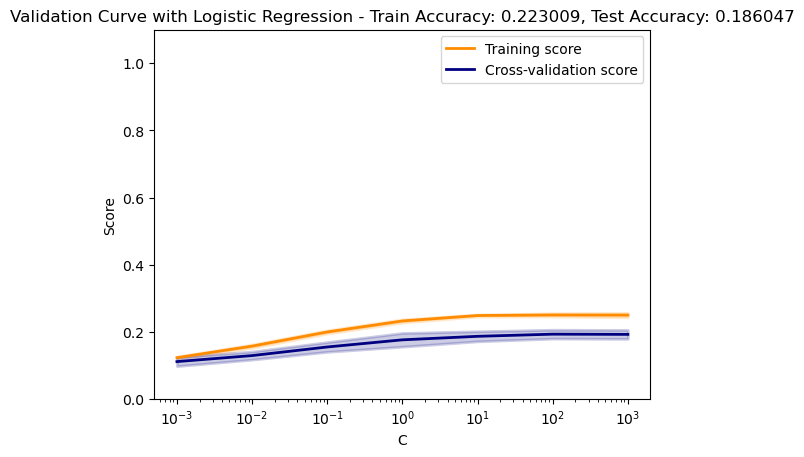

In [26]:
model_trainer.train_logistic_regression(X_train, y_train, X_test, y_test)

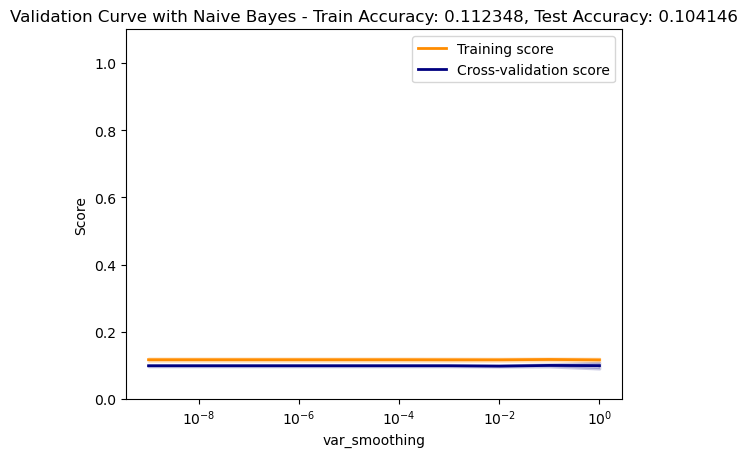

In [27]:
model_trainer.train_naive_bayes(X_train, y_train, X_test, y_test)

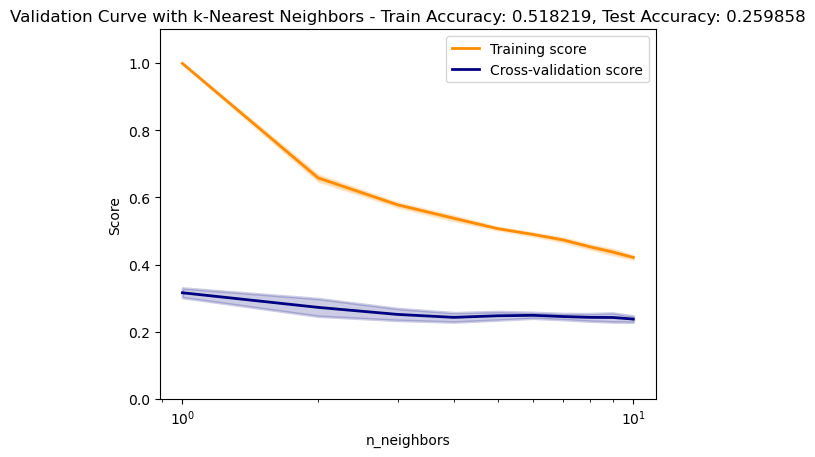

In [28]:
model_trainer.train_knn(X_train, y_train, X_test, y_test)

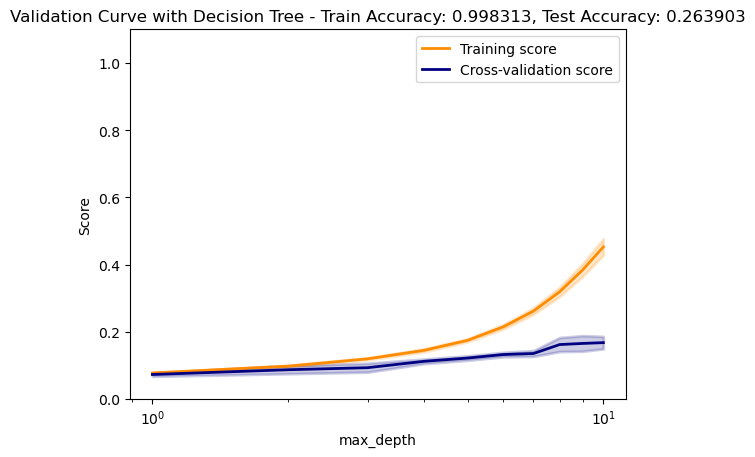

In [29]:
model_trainer.train_decision_tree(X_train, y_train, X_test, y_test)

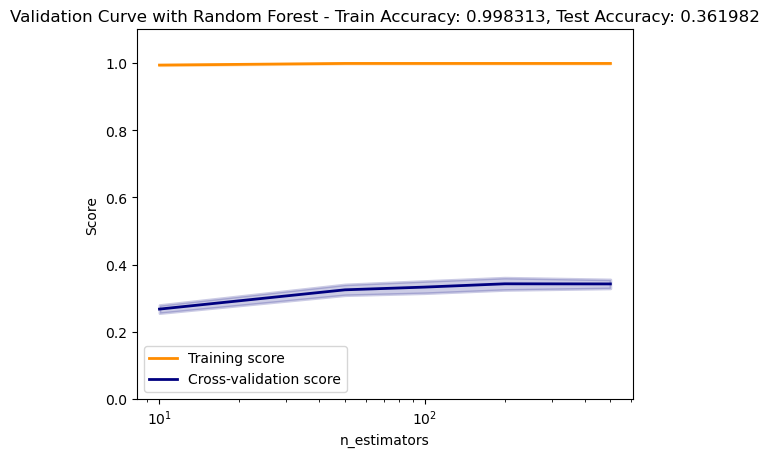

In [30]:
model_trainer.train_random_forest(X_train, y_train, X_test, y_test)

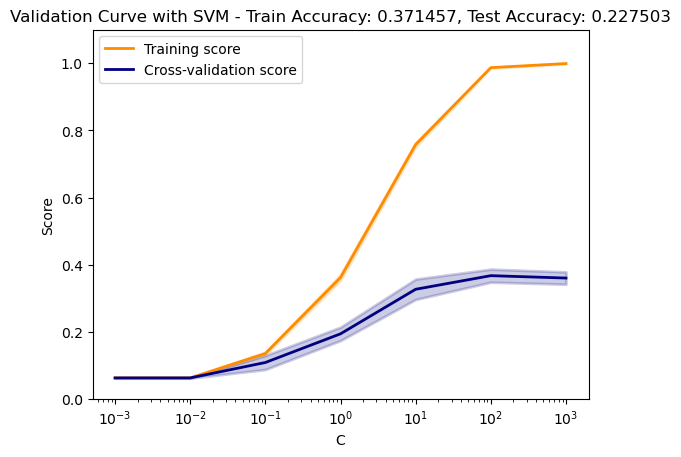

In [31]:
model_trainer.train_svm(X_train, y_train, X_test, y_test)

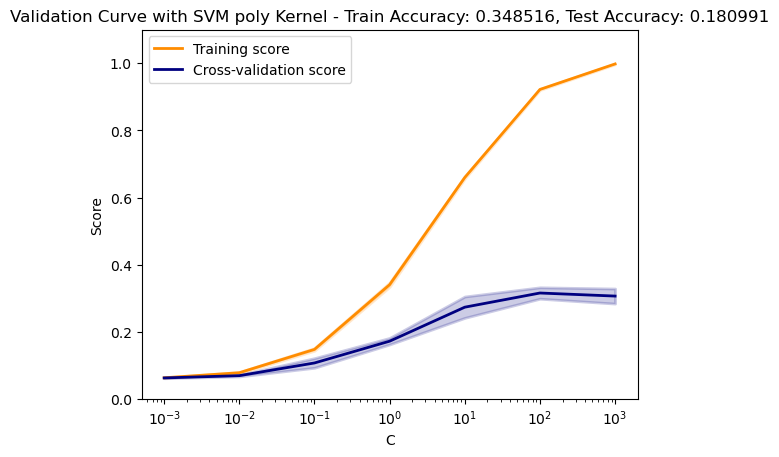

In [34]:
model_trainer.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='poly')

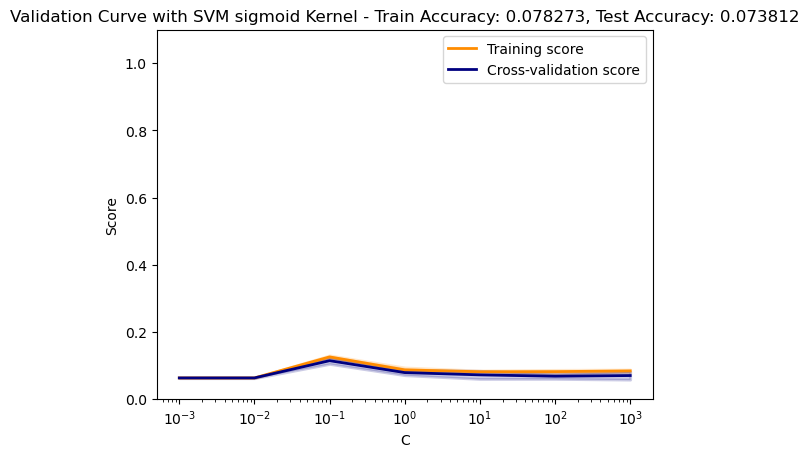

In [35]:
model_trainer.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='sigmoid')

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.25, 0.5, 0.75, 1],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Penalty (L1 or L2)
    'solver': ['liblinear', 'saga'],      # Solver algorithm
    'max_iter': [1000, 1500, 2000]          # Maximum number of iterations
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)


C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.22773279352226722
Test Accuracy: 0.17795753286147623


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the KNN model
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],      # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Train Accuracy: 0.9983130904183536
Test Accuracy: 0.34074823053589487


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the Decision Tree model
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],     # Criterion for splitting
    'max_depth': [None, 5, 10, 20, 30],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': [ 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)


C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\anasa\anaconda3\Lib\site-packa

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.9973009446693657
Test Accuracy: 0.2659251769464105


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest model
random_forest_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],      # Number of trees in the forest
    'criterion': ['gini', 'entropy'],     # Criterion for splitting
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)


In [35]:
pca=fc.pca_test(X)
df_pca=pd.DataFrame(pca)
df_pca

,0,1,2,3,4,5,6,7,8
0,-0.410785,-2.191436,1.394648,-1.022300,-0.670178,0.225020,-0.024581,-1.071834,-0.018149
1,1.584861,-0.266766,-0.982616,1.330344,0.762910,0.232340,-0.162418,-0.553980,-0.054845
2,1.046790,-1.236435,0.797912,1.801436,0.807447,0.041675,0.080375,-0.026016,-0.193752
3,-2.140034,3.236853,1.240137,-1.424484,3.129279,-0.186590,0.365497,-0.455990,-0.867707
4,0.381144,5.249261,2.408188,-2.060440,-1.215336,-0.115066,0.271699,0.621416,0.386019
...,...,...,...,...,...,...,...,...,...
812,-0.814593,-0.360685,0.114740,1.148315,0.174551,-0.469445,-0.001214,0.310749,-0.291676
813,-0.441297,1.012027,3.111796,-1.602960,-2.227377,0.023538,0.824418,-0.210448,-0.009020
814,-1.414113,-0.293841,-2.183952,2.219516,-0.543520,-0.710765,0.317892,0.326624,0.210462
815,0.551489,-0.400571,-0.769623,1.251549,0.884905,-0.215052,0.247686,-0.271708,-0.660209


In [36]:
fc.Dummy_model(pca,y)

0.4467564259485924

In [11]:
fc.fisher_score(X,y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [12]:
fc.forward_test(X,y)

C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\s

C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\s

C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\s

C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\s

array([ True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
       False, False])

In [13]:
# xx=x_train[:,[0,1,2,3,5,7,8,9,10,17]]
features=[0,1,2,3,4,8,9,11,15,17]
xx=X[:,features]
for i in features:
    print(dataset.columns[i])
fc.Dummy_model(xx,y)

chroma_stft
chroma_cqt
chroma_cens
melspectrogram
mfccs
spectral_contrast
spectral_flatness
poly_features
harmonic_rms
harmonic_spectral_contrast


0.45532435740514077

In [14]:
fc.recursive_feature_elimination(X,y)

C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False, False])

In [15]:
features=[0,1,2,3,4,5,6,7,8,9,11,12,13,15,17]
xx=X[:,features]
for i in features:
    print(dataset.columns[i])
fc.Dummy_model(xx,y)

chroma_stft
chroma_cqt
chroma_cens
melspectrogram
mfccs
rms
spectral_centroid
spectral_bandwidth
spectral_contrast
spectral_flatness
poly_features
zero_crossing_rate
harmonic_centroid
harmonic_rms
harmonic_spectral_contrast


0.48714810281517745

In [16]:
fc.feature_importances_LG(X,y)

C:\Users\anasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19], dtype=int64)

In [17]:
features=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19]
xx=X[:,features]
for i in features:
    print(dataset.columns[i])
fc.Dummy_model(xx,y)

chroma_stft
chroma_cqt
chroma_cens
melspectrogram
mfccs
rms
spectral_centroid
spectral_bandwidth
spectral_contrast
spectral_flatness
spectral_rolloff
poly_features
zero_crossing_rate
harmonic_centroid
harmonic_rms
harmonic_spectral_flatness
harmonic_spectral_contrast
harmonic_spectral_rolloff
harmonic_zero_crossing_rate


0.48714810281517745

In [18]:
results=fc.feature_importances_RFT(X,y)
print(results,end="")

[True, True, True, True, True, False, False, True, True, False, False, True, False, False, False, False, False, True, False, False]

In [19]:
features=[ 0,  1,  2,  3,  4,  7,  8, 11, 17]
xx=X[:,features]
for i in features:
    print(dataset.columns[i])
fc.Dummy_model(xx,y)

chroma_stft
chroma_cqt
chroma_cens
melspectrogram
mfccs
spectral_bandwidth
spectral_contrast
poly_features
harmonic_spectral_contrast


0.4283965728274174

In [20]:
fc.mutual_information(X,y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True])

In [21]:
features=[ 0,  1,  2,  3,  4, 5,6, 7,  8, 9, 10, 11, 13, 15, 16, 17, 18, 19]
xx=X[:,features]
for i in features:
    print(dataset.columns[i])
fc.Dummy_model(xx,y)

chroma_stft
chroma_cqt
chroma_cens
melspectrogram
mfccs
rms
spectral_centroid
spectral_bandwidth
spectral_contrast
spectral_flatness
spectral_rolloff
poly_features
harmonic_centroid
harmonic_rms
harmonic_spectral_flatness
harmonic_spectral_contrast
harmonic_spectral_rolloff
harmonic_zero_crossing_rate


0.48714810281517745

In [124]:
# pip install tensorflow

In [37]:
import tensorflow.keras as keras
from sklearn.metrics import accuracy_score

class ModelTraining1:
    def __init__(self):
        self.models_accuracy = {}

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test):
        # Define the deep learning model architecture
        model = keras.Sequential([
            keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(len(set(y_train)), activation='softmax')
        ])

        # Compile the model
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Evaluate the model on training data
        train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

        # Evaluate the model on testing data
        test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

        return train_accuracy, test_accuracy

    def evaluate_models(self, X_train, y_train, X_test, y_test):
        # Train and evaluate deep learning model
        train_acc_dl, test_acc_dl = self.train_deep_learning_model(X_train, y_train, X_test, y_test)
        self.models_accuracy['Deep Learning'] = {'Train Accuracy': train_acc_dl, 'Test Accuracy': test_acc_dl}

        # Add other models here if needed

        return self.models_accuracy


In [38]:
m=ModelTraining1()
m.train_deep_learning_model(X_train, y_train, X_test, y_test)
m.evaluate_models(X_train, y_train, X_test, y_test)

C:\Users\anasa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'Deep Learning': {'Train Accuracy': 0.24089068174362183,
  'Test Accuracy': 0.16683518886566162}}